# ALL IMPORTS

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

# Sampling bias of a uniform variable

Here we change the probability distribution of a uniform random variable, changing the weights of the values to $ e^{-3.6X}$ so that the mean becomes 0.25 instead of 0.5 . 

0.2401806214181752


(array([3.27785503, 2.14791121, 1.50659175, 1.12994381, 0.71257718,
        0.63113979, 0.30539022, 0.21377315, 0.19341381, 0.06107804]),
 array([0.00160967, 0.09984464, 0.19807961, 0.29631459, 0.39454956,
        0.49278453, 0.5910195 , 0.68925448, 0.78748945, 0.88572442,
        0.9839594 ]),
 <BarContainer object of 10 artists>)

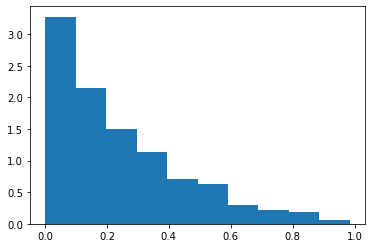

In [24]:
n=100000
n1=1000
X=np.random.uniform(0.,1.,size=n)
P=(np.exp(-3.6*X))/ (np.sum(np.exp(-3.6*X)))
X_sub=np.random.choice(X,size=n1,p=P)
mean_X_sub=np.sum(X_sub)/n1
print(mean_X_sub)
plt.hist(X_sub,density=True)

# Sampling Bias à la Cameron-Martin 
We will check the Cameron Martin theorem on the brownian motion with drift 1. 
We first sample 100 000 paths and apply probability change with new weights $𝑀(𝐵) = e^{−B_1 +1/2}$
We check that the PDF of  $B_{1/2}$ has the same distribution of a gaussian random variable with mean 0 and variance 1/2 .
And finally we plot B with both probabilities .

0.022176056598074933
0.49768919207698836


(array([0.01393261, 0.03715362, 0.02322102, 0.06966305, 0.09752826,
        0.24149856, 0.38082465, 0.43655508, 0.55730436, 0.59910219,
        0.48764132, 0.56194857, 0.33438262, 0.28329638, 0.17183551,
        0.16719131, 0.07895145, 0.06966305, 0.01393261, 0.01857681]),
 array([-2.11422077, -1.89889857, -1.68357637, -1.46825418, -1.25293198,
        -1.03760978, -0.82228759, -0.60696539, -0.39164319, -0.17632099,
         0.0390012 ,  0.2543234 ,  0.4696456 ,  0.68496779,  0.90028999,
         1.11561219,  1.33093439,  1.54625658,  1.76157878,  1.97690098,
         2.19222317]),
 <BarContainer object of 20 artists>)

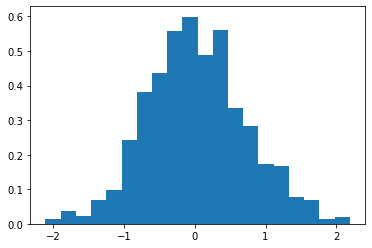

In [56]:
step_size=0.01
d = 100000
T = 1.
x=0.
n=int(T/step_size)
n1=1000
times = np.linspace(0., T, n)
times=times.reshape((n,1))
dt = times[1] - times[0]
# Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
B0 = x*np.ones(shape=(1, d))
B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
B_tild=B+times
S_tild=np.zeros((n,n1))
P=np.exp(-B_tild[n-1,:]+0.5)/np.sum(np.exp(-B_tild[n-1,:]+0.5))
for i in range(n):
    S_tild[i,:]=np.random.choice(B_tild[i,:],size=n1,p=P)
print(np.sum(S_tild[int(n/2),:])/n1) # printing the mean
print(np.sum(np.power(S_tild[int(n/2),:],2))/n1) # the variance 
plt.hist(S_tild[int(n/2),:],density=True,bins=20) # the PDF of B tild at time 1/2 looks like a gaussian with mean 0 aand variance 1/2

Text(0.5, 1.0, 'Plotting 10 paths after probability change')

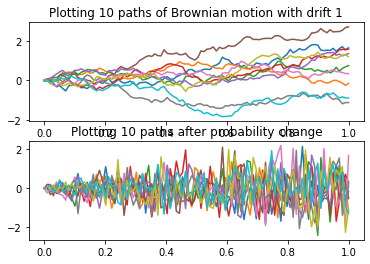

In [62]:
#we do all the plotting 
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(times,B_tild[:,:10])
ax1.set_title("Plotting 10 paths of Brownian motion with drift 1")
ax2.plot(times,S_tild[:,:10])
ax2.set_title('Plotting 10 paths after probability change')

# Sampling Bias à la Girsanov 


(array([0.00565795, 0.0113159 , 0.04526362, 0.10750109, 0.07921133,
        0.1414488 , 0.19237037, 0.18671242, 0.2489499 , 0.29421351,
        0.29987146, 0.40737256, 0.30552942, 0.44132027, 0.36210894,
        0.31684532, 0.44132027, 0.34513508, 0.35079303, 0.24329194,
        0.18105447, 0.22631809, 0.09618519, 0.09618519, 0.06223747,
        0.06789543, 0.03394771, 0.        , 0.        , 0.06789543]),
 array([-2.46288331, -2.28614092, -2.10939853, -1.93265614, -1.75591375,
        -1.57917135, -1.40242896, -1.22568657, -1.04894418, -0.87220179,
        -0.69545939, -0.518717  , -0.34197461, -0.16523222,  0.01151017,
         0.18825257,  0.36499496,  0.54173735,  0.71847974,  0.89522213,
         1.07196453,  1.24870692,  1.42544931,  1.6021917 ,  1.77893409,
         1.95567649,  2.13241888,  2.30916127,  2.48590366,  2.66264605,
         2.83938845]),
 <BarContainer object of 30 artists>)

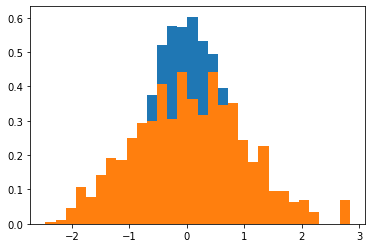

In [89]:
step_size=0.01
d = 10000
T = 1.
x=0.
n=int(T/step_size)
n1=1000
#We create 100 paths of  brownian motion with discretization step 0.01 and up to time 0.25 starting at x
times = np.linspace(0., T, n)
times=times.reshape((n,1))
dt = times[1] - times[0]
# Bt2 - Bt1 ~ Normal with mean 0 and variance t2-t1
dB = np.sqrt(dt) * np.random.normal(size=(n - 1, d))
B0 = x*np.ones(shape=(1, d))
B = np.concatenate((B0, x+np.cumsum(dB, axis=0)), axis=0)
#Computing the SDE
Y=np.zeros((n,d))
for i in range(1,n):
    Y[i,:]=(Y[i-1,:]-Y[i-1,:]*dt+dB[i-1,:])
#CHANGE OF PROBABILITY 
S_tild=np.zeros((n,n1))
P=np.exp(np.sum(Y[:n-1,:]*dB -0.5*np.power(Y[:n-1,:],2)*dt,axis=0)) /np.sum(np.exp(np.sum(Y[:n-1,:]*dB -0.5*np.power(Y[:n-1,:],2)*dt,axis=0)))
for i in range(n):
    S_tild[i,:]=np.random.choice(Y[i,:],size=n1,p=P)
#Plotting
"""fig,(ax1,ax2)=plt.subplots(2)
ax1.hist(S_tild[n-1,:],density=True)
print(np.sum(np.power(S_tild[n-1,:],2))/n1) # printing the variance 
ax2.hist(Y[n-1,:],density=True)
print(np.sum(np.power(Y[n-1,:],2))/n1) # printing the variance
plt.show()"""
plt.hist(Y[n-1,:],density=True,bins=30)
plt.hist(S_tild[n-1,:],density=True,bins=30)
